In [1]:
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
from helpers import *

In [2]:
Presicion().cambiarPresicionRepresentacion(0.0001)
Presicion.presicionActual()

4

In [3]:
def decimal_truncate(numero, decimales):
    if (decimales < 0): raise Exception("el N° de decimales a truncar debe ser positivo")
    factor = 10.0 ** decimales
    return m.trunc(numero * factor) / factor


In [4]:
#funcion que ingresa los decimales exactos
def decExactos_a_tolerancia(exactitud):
    if (exactitud < 0): raise Exception("La exactitud debe ser positiva o 0")
    #scamos el valor de paradad dada la exactitud
    tolerancia = "0."
    #agregamos tantos 0 como exactitud indicada
    for i in range(exactitud): tolerancia += "0"
    #agregamos un uno para indicar que es una fraccion
    tolerancia += "1"
    #convertimos a flotante para poder operar
    return float(tolerancia)
"""
    x: recibe un valor cercano a la raiz que se busca aproximar
    tolerancia: 0 < Numero < 1 que indica el intervalo de corte de la funcion ej: 0.0001 (como minimo3 deciamles exactos)
    f: funcion de tipo numerica
"""
def aproximar_raiz_newton_secante(x,tolerancia,f):
    symbol = sp.symbols("x")
    #instanciamos derivada de la funcion
    f1 = sp.lambdify(symbol,sp.diff(f(symbol)),np)
    #anidamos funcion para poder utilizar variables no locales
    def secante():
        try:
            return x1 - ((f(x1)*(x1-x))/(f(x1)-f(x)))
        except ZeroDivisionError:
            print(f"error: f({x}) = 0, no se puede dividir por 0")
            exit(6)
    #------------------------- fin secante ----------------------------------    
    while(True):    
        try:
            x1 = x - (f(x)/f1(x))
        except ZeroDivisionError:
            print(f"error: f'({x}) = 0, no se puede dividir por 0")
            exit(6)
        if (abs(x-x1) <= tolerancia):
            break
        x = secante()
    return (x1)

In [5]:
##Polinomio de larange
def lagrange_interpolation(points):
    n = len(points)
    polynomial = []
    for i in range(n):
        term = []
        numerator = []
        denominator = []
        for j in range(n):
            if i != j:
                numerator.append('(x - {})'.format(points[j][0]))
                denominator.append('({} - {})'.format(points[i][0], points[j][0]))
        term.append('*'.join(numerator))
        term.append('/'.join(denominator))
        polynomial.append('*'.join(term))
    polynomial = '+'.join(polynomial)
    polynomial = sp.expand(polynomial)
    x =  sp.symbols("x")
    return sp.lambdify(x,polynomial,"numpy")

In [6]:
lista_puntos = np.array([(2,-3),(1,-1),(-1,5),(-2,7),(-3,9)]) #ACA CARGAR LOS PUNTOS DEL PARCIAL
lista_puntos

array([[ 2, -3],
       [ 1, -1],
       [-1,  5],
       [-2,  7],
       [-3,  9]])

In [7]:
poliNewton = NEquation(lista_puntos)
print("El polinomio generado es el siguiente: ")
poliNewton.imprimirEcuacion()

El polinomio generado es el siguiente: 


-2.0*x + (0.05*x - 0.1)*(x - 1)*(x + 1)*(x + 2) + (0.1667*x - 0.3334)*(x - 1)*(x + 1) + (0.3333*x - 0.6666)*(x - 1) + 1.0

In [8]:
gradoPolinomio = testeoGrado(lista_puntos, poliNewton.imprimirEcuacion())
print(f"El grado del polinomio obtendio es: {gradoPolinomio}")

El grado del polinomio obtendio es: 4


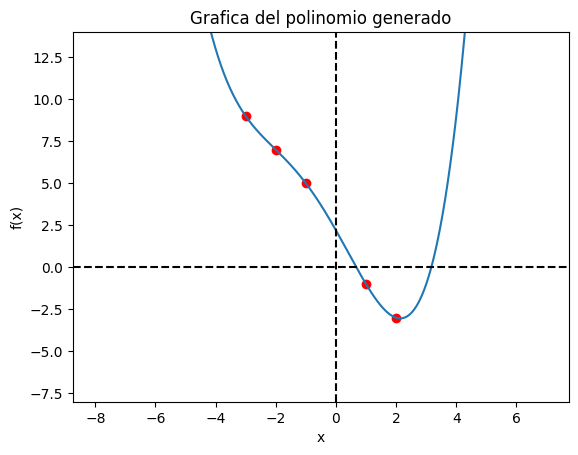

In [9]:
PUNTOS_X =[punto[0] for punto in lista_puntos]
PUNTOS_Y = [punto[1] for punto in lista_puntos]
graficar(PUNTOS_X, PUNTOS_Y, poliNewton.equation(), "Grafica del polinomio generado")

In [12]:

RAIZ = aproximar_raiz_newton_secante(3,Presicion.presicionActualEnDecimal(),poliNewton.equation())
RAIZ

3.1688103210532526

In [ ]:
#     ##generacion de simbolo para todas las funciones
#     symbol = sp.symbols("x")
#     #---------------------------------------------------------------------------------
#     saltosDeLinea(2)
#     print("POLINOMIO CON X ORDENADO DE MENOR A MAYOR = POL1")
#     saltosDeLinea(2)
#     print("puntos generados aleatoriamente ordenados segun x de menor a mayor:")
#     print(lista_puntos)
#     ##calulo de polinomio generado por puntos ordenados segun x de menor a mayor
#     saltosDeLinea(2)
#     poli_newton_asc = nEquation(lista_puntos)
#     print("Polinomio generado:")

#     simbolic_poli_newton_asc = sp.simplify(poli_newton_asc(symbol))
#     print(simbolic_poli_newton_asc)


#     #grafico de la funcion con sus respectivos puntos
#     saltosDeLinea(2)
#     PUNTOS_X_ASC =[punto[0] for punto in lista_puntos]
#     PUNTOS_Y_ASC = [punto[1] for punto in lista_puntos]
#     grafico(PUNTOS_X_ASC,PUNTOS_Y_ASC,poli_newton_asc,"Grafico del polinomio generado con x ordenado de < a >")
#     saltosDeLinea(2)


#     print("Busqueda de una raiz del POL1 con metood de newton-rapson")
#     RAIZ = aproximar_raiz_newton_secante(3,0.001,poli_newton_asc)
#     print(f"raiz aproximada con el metodo {decimal_truncate(RAIZ,3)}")
#     #---------------------------------------------------------------------------------
#     saltosDeLinea(2)
#     print("POLINOMIO CON X ORDENADO DE MENOR A MAYOR = POL2")
#     ##calulo de polinomio generado por puntos ordenados segun x de menor a mayor
#     saltosDeLinea(2)
#     print("puntos generados aleatoriamente ordenados segun x de mayor a menor:")
#     print(lista_puntos_desc)
#     saltosDeLinea(2)
#     poli_newton_dec = nEquation(lista_puntos_desc)
#     print("Polinomio generado:")
#     simbolic_poli_newton_dec = sp.simplify(poli_newton_dec(symbol))
#     print(simbolic_poli_newton_dec)
#     ##Testeo de grado del polinomio ordenado por x
#     saltosDeLinea(1)
#     testeoGrado(cantPuntos=len(lista_puntos_desc),FuncNewton=poli_newton_dec)
#     #grafico de la funcion con sus respectivos puntos
#     saltosDeLinea(2)
#     PUNTOS_X_ASC =[punto[0] for punto in lista_puntos_desc]
#     PUNTOS_Y_ASC = [punto[1] for punto in lista_puntos_desc]
#     grafico(PUNTOS_X_ASC,PUNTOS_Y_ASC,poli_newton_dec,"Grafico del polinomio generado con x ordenado de > a <")
#     saltosDeLinea(1)
#     print("podemos observar que el grado del polinomio encontrado es igual al anterior:")
#     print(f"grdPOL1({sp.degree(simbolic_poli_newton_asc)}) = grdPOL2 = {sp.degree(simbolic_poli_newton_dec)}")
#     saltosDeLinea(1)
#     print(f"para saber si dos polinomios son iguales estos tienen que serlo en grado y coeficiente a coeficiente")
#     print(f"------------------------------ Comparacion visual de polinomios ------------------------------")
#     print("POL1")
#     print(simbolic_poli_newton_asc)
#     print("POL2")
#     print(simbolic_poli_newton_dec)
#     print (f"se puede observar que los polinomios son iguales, pero por razones de diferencias de aproximacion numerica difieren en los ultimos decimales")
#    #---------------------------------------------------------------------------------
#     saltosDeLinea(2)
#     print("POLINOMIO CON LOS PUNTOS DESORDENADOS = POL3")
#     ##calulo de polinomio generado por puntos ordenados segun x de menor a mayor
#     saltosDeLinea(2)
#     print("puntos generados aleatoriamente desordenados:")
#     print(lista_puntos)
#     saltosDeLinea(2)
#     poli_newton_desor = nEquation(lista_puntos)
#     print("Polinomio generado:")
#     simbolic_poli_newton_desor = sp.simplify(poli_newton_desor(symbol))
#     print(simbolic_poli_newton_desor)
#     ##Testeo de grado del polinomio ordenado por x
#     saltosDeLinea(1)
#     testeoGrado(cantPuntos=len(lista_puntos),FuncNewton=poli_newton_desor)
#     #grafico de la funcion con sus respectivos puntos
#     saltosDeLinea(2)
#     PUNTOS_X_ASC =[punto[0] for punto in lista_puntos]
#     PUNTOS_Y_ASC = [punto[1] for punto in lista_puntos]
#     grafico(PUNTOS_X_ASC,PUNTOS_Y_ASC,poli_newton_desor,"Grafico del polinomio generado con x desordenado")
#     saltosDeLinea(1)
#     print("podemos observar que el grado del polinomio encontrado es igual al anterior:")
#     print(f"grdPOL1({sp.degree(simbolic_poli_newton_asc)}) = grdPOL3 = {sp.degree(simbolic_poli_newton_desor)}")
#     saltosDeLinea(1)
#     print(f"para saber si dos polinomios son iguales estos tienen que serlo en grado y coeficiente a coeficiente")
#     print(f"------------------------------ Comparacion visual de polinomios ------------------------------")
#     print("POL1")
#     print(simbolic_poli_newton_asc)
#     print("POL3")
#     print(simbolic_poli_newton_desor)
#     print (f"se puede observar que los polinomios son iguales, pero por razones de diferencias de aproximacion numerica difieren en los ultimos decimales")
#     #---------------------------------------------------------------------------------
#     saltosDeLinea(2)
#     print("POLINOMIO INTERPOLADOR DE LARANGE")
#     saltosDeLinea(2)
#     print("utilizamos mismos puntos que en el metodo de newton:")
#     print(lista_puntos)
#     saltosDeLinea(2)
#     print("Polinomio generado:")
#     poli_larange = lagrange_interpolation(lista_puntos)
#     simbolic_poli_laragne = sp.sympify(poli_larange(symbol))
#     print(simbolic_poli_laragne)
#     saltosDeLinea(2)
#     print("-------------------------------- Concluciones --------------------------------")
#     print("""Se puede ver que el metodo de larange tambien genera un polinomio de grado teorico
#     (cantidad de puntos - 1) pero es diferente en coeficientes""")
#     print("\n---------------------------------------------------------------------------------------\n")
#     print("""El metodo de larange es más fácil de entender y aplicar que el método de Newton, pero puede ser menos 
#     eficiente en términos computacionales cuando se tienen muchos puntos""")
#     print("\n---------------------------------------------------------------------------------------\n")
#     print("""ambos métodos son útiles para aproximar una función a través de un polinomio interpolador. 
#     La elección del método dependerá del número de puntos disponibles y la eficiencia computacional requerida.""")